<a href="https://colab.research.google.com/github/Edgar-La/Machine_Learning/blob/main/Minimum_Euclidean_distance_classifier/MEDC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  
# Edgar Lara Arellano
# Clasificador por mínima distancia

In [240]:
#Seccion para importar modulos
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean

## PASO 1 y 2
1) Mediante la función make_blobs del paquete sklearn.datasets, genere 200 puntos divididos en 3 clases con desviación estándar de 0.5. Guarde las coordenadas de los 200 puntos en una variable llamada training_data y los indicadores de clase en una variable llamada labels. Grafique un scatter plot usando un color distinto para los puntos en cada una de las 3 clases.

2) Usando la misma función que el paso 1, 3 clases y desviación estándar 0.5, genere 10 puntos nuevos y guárdelos en una variable llamada test_data

In [47]:
#Funcion que llama al metodo -make_blobs()-
def crear_puntos_1(n_MUESTRAS, k_CENTROS, std_dev):
	training_data , labels = make_blobs(n_samples=n_MUESTRAS, centers=k_CENTROS, cluster_std = std_dev, random_state=2)
	return training_data, labels

## Paso 3
Siga el pseudocódigo descrito en las diapositivas adjuntas y calcule los vectores promedio para cada una de las 3 clases. Grafique los vectores promedio sobre el scatter plot del paso anterior, pinte estos vectores de un color distinto al de las 3 clases y aumente el tamaño de estos puntos para que se distingan del resto. Puede usar un marcador o símbolo diferente al default.

In [237]:
#Vectores promedio para cada una de las 3 clases
def Vectores_Promedio(training_data, labels):
  #Hagdo una copia del arreglo de training_data
  training_data_copy = training_data.copy(); training_data_copy = training_data_copy.tolist()

  #Clasifico los puntos(200) en una lista de 3 elementos(3 clases)
  arreglo_aux = [[], [], []]
  for n in range(len(training_data_copy)):
    if labels[n] == 0:
      arreglo_aux[0].append(training_data_copy[n])
    elif labels[n] == 1:
      arreglo_aux[1].append(training_data_copy[n])
    elif labels[n] == 2:
      arreglo_aux[2].append(training_data_copy[n])

  #Uso numpy por facilidad
  for n in range(len(arreglo_aux)):
    arreglo_aux[n] = np.array(arreglo_aux[n])
  
  #Calculo el promedio de c/una de las clases
  vectores_promedio = []
  for n in range(len(arreglo_aux)):
    vectores_promedio.append(np.mean(arreglo_aux[n],  axis=0))
  vectores_promedio = np.array(vectores_promedio)
  #print(vectores_promedio)

  return vectores_promedio
  

## Paso 4
Calcule la distancia Euclidiana de cada uno de los 10 puntos de prueba a los centros de cada clase y guarde estos valores en una matriz de numpy o un dataframe de pandas llamado distance_matrix

In [257]:
def distancia_euclidiana(test_data, vectores_promedio):
  distance_matrix = []
  for n in range(len(test_data)):
    aux = []
    for i in range(len(vectores_promedio)):
      aux.append(np.linalg.norm(test_data[n] - vectores_promedio[i]))
    distance_matrix.append(aux)
  distance_matrix = np.array(distance_matrix)
  #print(distance_matrix)
  return distance_matrix


## Paso 5
Asigne a cada uno de los 10 puntos de prueba la etiqueta de clase correspondiente al centroide con distancia mínima y guarde estas asignaciones (predicted_labels) en una columna extra de la matriz o dataframe.

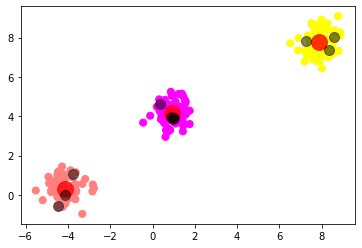

In [258]:
training_data, labels = crear_puntos(200, 3, 0.5)
test_data, y = crear_puntos(10, 3, 0.5)
vectores_promedio = Vectores_Promedio(training_data, labels)
plt.scatter(training_data[:,0], training_data[:,1], c=labels, s=50, cmap='spring')
plt.scatter(vectores_promedio[:,0], vectores_promedio[:,1], c='red', s=250, alpha = .8)
plt.scatter(test_data[:,0], test_data[:,1], c='black', s=100, alpha = .5)
distance_matrix = distancia_euclidiana(test_data, vectores_promedio)